In [1]:
## Based on
#  - https://machinelearningmastery.com/clustering-algorithms-with-python/

In [2]:
import sklearn

In [3]:
# synthetic classification dataset
from numpy import where, unique
from sklearn.datasets import make_classification
from matplotlib import pyplot

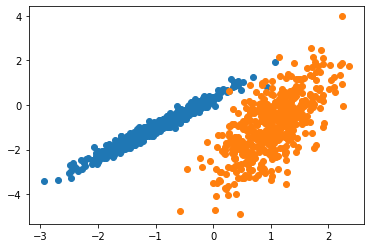

In [4]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [5]:
# Import for clustering
import sklearn.cluster

In [12]:
def cluster_predict_show(model, X, y):
    
    # Fit the model
    model.fit(X)
    
    # assign a cluster to each example
    yhat = model.predict(X)

        # retrieve unique clusters
    clusters = unique(yhat)

    # create scatter plot for samples from each cluster
    for cluster in clusters:

        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)

        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show the plot
pyplot.show()

In [13]:
def cluster_fitpredict_show(model, X, y):
    
    # assign a cluster to each example
    yhat = model.fit_predict(X)

        # retrieve unique clusters
    clusters = unique(yhat)

    # create scatter plot for samples from each cluster
    for cluster in clusters:

        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)

        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show the plot
pyplot.show()

/Users/biplavs/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


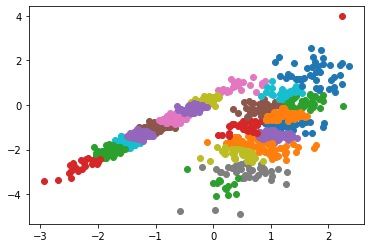

In [14]:
# define a clustering model and show results
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9)
cluster_predict_show(model, X, y)

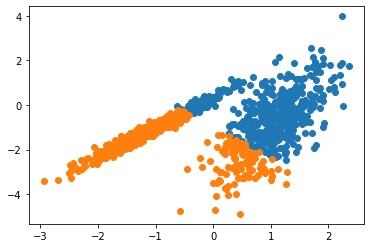

In [15]:
# define a clustering model and show results
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
cluster_predict_show(model, X, y)

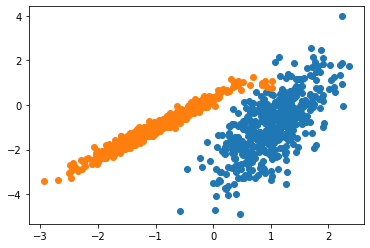

In [16]:
# define a clustering model and show results
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=2)
cluster_predict_show(model, X, y)

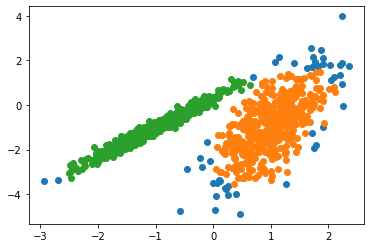

In [17]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.30, min_samples=9)
cluster_fitpredict_show(model, X, y)